In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing import image
import numpy as np
from pathlib import Path
import joblib

2022-09-04 11:39:47.992512: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-04 11:39:47.998497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

# Load data set


In [3]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/train.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)


,filepath,classification
0,A558691-12-31-1900-NA-CHEST_AP_VIEWONLY-55436-...,positive
1,MIDRC-RICORD-1C-419639-003029-68072-0.png,positive


In [4]:
df_data.groupby('classification').count()

,filepath
classification,
negative,3358
positive,3838


In [5]:
train_path = Path("../../covidx-cxr2-dataset/clahe/clahe-train")

images = []
labels = []

In [6]:
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

In [7]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img, count)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54CBEE0> 1
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F55B0> 2
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F56A0> 3
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F56D0> 4
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F58E0> 5
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5A90> 6
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F58E0> 7
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5BE0> 8
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5C40> 9
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5E50> 10
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5EB0> 11
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5E50> 12
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54FB100> 13
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54FB0D0> 14
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54FB2B0> 15
<PIL

In [8]:
len(images)

7196

In [9]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([3358, 3838]))

In [10]:
# Create a single numpy array with all the images we loaded
x_train = np.array(images)

# Also convert the labels to a numpy array
y_train = np.array(labels)

In [11]:
x_train.shape

(7196, 224, 224, 3)

In [12]:
y_train.shape

(7196,)

In [13]:
# Normalize image data to 0-to-1 range
x_train /= 255

print(x_train[0], x_train.shape)

[[[0.07450981 0.07450981 0.07450981]
  [0.04705882 0.04705882 0.04705882]
  [0.05882353 0.05882353 0.05882353]
  ...
  [0.09411765 0.09411765 0.09411765]
  [0.13333334 0.13333334 0.13333334]
  [0.16078432 0.16078432 0.16078432]]

 [[0.0627451  0.0627451  0.0627451 ]
  [0.04705882 0.04705882 0.04705882]
  [0.04705882 0.04705882 0.04705882]
  ...
  [0.02745098 0.02745098 0.02745098]
  [0.03921569 0.03921569 0.03921569]
  [0.02745098 0.02745098 0.02745098]]

 [[0.04705882 0.04705882 0.04705882]
  [0.02352941 0.02352941 0.02352941]
  [0.03529412 0.03529412 0.03529412]
  ...
  [0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569]
  [0.02745098 0.02745098 0.02745098]]

 ...

 [[0.20784314 0.20784314 0.20784314]
  [0.12156863 0.12156863 0.12156863]
  [0.05490196 0.05490196 0.05490196]
  ...
  [0.14509805 0.14509805 0.14509805]
  [0.27058825 0.27058825 0.27058825]
  [0.39215687 0.39215687 0.39215687]]

 [[0.26666668 0.26666668 0.26666668]
  [0.18431373 0.18431373 0.18431373]


Load validation data

In [14]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/val.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)

,filepath,classification
0,A866354-12-30-1900-NA-CHEST_AP_VIEWONLY-21494-...,positive
1,A329601-12-31-1900-NA-CHEST_AP_PORTABLE-09571-...,positive


In [15]:
df_data.groupby('classification').count()

,filepath
classification,
negative,420
positive,480


In [16]:
train_path = Path("../../covidx-cxr2-dataset/clahe/clahe-val")

images = []
labels = []

In [17]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5490460>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5490880>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800F10>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800A90>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C58001F0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800370>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800E20>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800160>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800130>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C58004F0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800070>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C5800700>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5E80>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F59A0>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F37C54F5EB0>
<PIL.Image.Image image mode=RGB size=224

In [18]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([420, 480]))

In [19]:
# Create a single numpy array with all the images we loaded
x_val = np.array(images)

# Also convert the labels to a numpy array
y_val = np.array(labels)

# Normalize image data to 0-to-1 range
x_val /= 255

print(x_val.shape, y_val.shape)

(900, 224, 224, 3) (900,)


In [20]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", activation="relu", strides=(1,1), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu", strides=(1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation="relu", strides=(1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), activation="relu", strides=(1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(4, (3, 3), activation="relu", strides=(1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      18464     
                                                                 
 batch_normalization_1 (Batc  (None, 110, 110, 32)     128       
 hNormalization)                                                 
                                                        

2022-09-04 11:42:39.564943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi/3.4.2-GCCcore-11.2.0/lib64:/rds/bear-apps/2021b/EL8-cas/software/GMP/6.2.1-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/XZ/5.2.5-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/SQLite/3.36-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Tcl/8.6.11-GCCcore-11.2.0/lib:/rds/b

In [21]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [22]:
# Find class weights
import numpy as np
c_pneumonia_count = np.count_nonzero(y_train == 1)
c_normal_count = np.count_nonzero(y_train == 0)
c_train_count = y_train.size
print(c_normal_count,c_pneumonia_count, c_train_count)

3358 3838 7196


In [23]:
weight_for_0 = (1 / c_normal_count)*(c_train_count)/2.0 
weight_for_1 = (1 / c_pneumonia_count)*(c_train_count)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.07
Weight for class 1: 0.94


In [24]:
import keras.callbacks as callbacks

In [25]:
checkpoint_filepath = Path("./checkpoints")
checkpoint_cb = callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [26]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = callbacks.LearningRateScheduler(exponential_decay_fn)

In [27]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    shuffle=True,
    validation_data=(x_val,y_val),
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.7710

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 45s 197ms/step - loss: 0.4680 - accuracy: 0.7710 - val_loss: 10.2775 - val_accuracy: 0.5333 - lr: 0.0100
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 0.3056 - accuracy: 0.8677

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 42s 186ms/step - loss: 0.3056 - accuracy: 0.8677 - val_loss: 0.4614 - val_accuracy: 0.8089 - lr: 0.0089
Epoch 3/20
225/225 [==============================] - ETA: 0s - loss: 0.2449 - accuracy: 0.8969

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 42s 186ms/step - loss: 0.2449 - accuracy: 0.8969 - val_loss: 0.3482 - val_accuracy: 0.8389 - lr: 0.0079
Epoch 4/20
225/225 [==============================] - 40s 176ms/step - loss: 0.2075 - accuracy: 0.9134 - val_loss: 0.7977 - val_accuracy: 0.5333 - lr: 0.0071
Epoch 5/20
225/225 [==============================] - 40s 178ms/step - loss: 0.1955 - accuracy: 0.9227 - val_loss: 0.8633 - val_accuracy: 0.5644 - lr: 0.0063
Epoch 6/20
225/225 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9357

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 42s 188ms/step - loss: 0.1665 - accuracy: 0.9357 - val_loss: 0.3218 - val_accuracy: 0.8678 - lr: 0.0056
Epoch 7/20
225/225 [==============================] - 41s 181ms/step - loss: 0.1445 - accuracy: 0.9432 - val_loss: 0.6689 - val_accuracy: 0.7567 - lr: 0.0050
Epoch 8/20
225/225 [==============================] - 41s 182ms/step - loss: 0.1210 - accuracy: 0.9519 - val_loss: 1.1927 - val_accuracy: 0.6178 - lr: 0.0045
Epoch 9/20
225/225 [==============================] - 41s 183ms/step - loss: 0.1107 - accuracy: 0.9587 - val_loss: 0.5383 - val_accuracy: 0.8389 - lr: 0.0040
Epoch 10/20
225/225 [==============================] - 41s 184ms/step - loss: 0.0896 - accuracy: 0.9671 - val_loss: 3.0818 - val_accuracy: 0.5378 - lr: 0.0035
Epoch 11/20
225/225 [==============================] - 41s 184ms/step - loss: 0.0845 - accuracy: 0.9689 - val_loss: 0.6790 - val_accuracy: 0.7522 - lr: 0.0032
Epoch 12/20
225/225 [==============================] - 41s 18

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 43s 191ms/step - loss: 0.0384 - accuracy: 0.9849 - val_loss: 0.2166 - val_accuracy: 0.9422 - lr: 0.0018
Epoch 17/20
225/225 [==============================] - 40s 178ms/step - loss: 0.0313 - accuracy: 0.9879 - val_loss: 0.4435 - val_accuracy: 0.8856 - lr: 0.0016
Epoch 18/20
225/225 [==============================] - 40s 179ms/step - loss: 0.0237 - accuracy: 0.9907 - val_loss: 5.3415 - val_accuracy: 0.5689 - lr: 0.0014
Epoch 19/20
225/225 [==============================] - 41s 181ms/step - loss: 0.0231 - accuracy: 0.9911 - val_loss: 0.2448 - val_accuracy: 0.9511 - lr: 0.0013
Epoch 20/20
225/225 [==============================] - 41s 181ms/step - loss: 0.0199 - accuracy: 0.9918 - val_loss: 0.2798 - val_accuracy: 0.9478 - lr: 0.0011


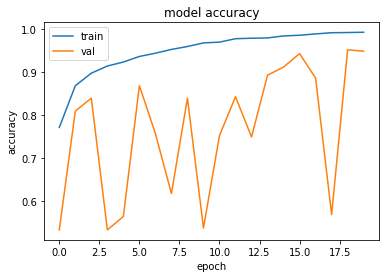

In [28]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

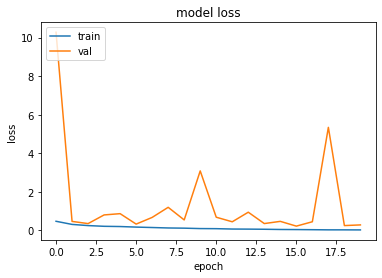

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
# Save neural network structure
model_structure = model.to_json()
f = Path("./model/model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("./model/model_weights.h5")